Import required libraries and modules

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score


Import training, validation and testing datasets

In [110]:
# file paths for the datasets
train_path = './../data/layer 11/train.csv'
valid_path = './../data/layer 11/valid.csv'
test_path = './../data/layer 11/test.csv'

# Load the train dataset
train_data = pd.read_csv(train_path)

# Load the valid dataset
valid_data = pd.read_csv(valid_path)

# Load the test dataset
test_data = pd.read_csv(test_path)

Get List of IDs in test dataset

In [111]:
ID = test_data['ID'].to_numpy()

Drop the ID column

In [112]:
test_data = test_data.drop(columns=['ID'])

Construct validation and training data for each label

In [113]:
# Datasets for each label in train dataset
train_data_label1 = train_data.drop(columns=['label_2', 'label_3', 'label_4'])
train_data_label2 = train_data.drop(columns=['label_1', 'label_3', 'label_4'])
train_data_label3 = train_data.drop(columns=['label_1', 'label_2', 'label_4'])
train_data_label4 = train_data.drop(columns=['label_1', 'label_2', 'label_3'])

# Datasets for each label in train dataset
valid_data_label1 = valid_data.drop(columns=['label_2', 'label_3', 'label_4'])
valid_data_label2 = valid_data.drop(columns=['label_1', 'label_3', 'label_4'])
valid_data_label3 = valid_data.drop(columns=['label_1', 'label_2', 'label_4'])
valid_data_label4 = valid_data.drop(columns=['label_1', 'label_2', 'label_3'])

### Check for outliers

In [116]:
train_features = train_data.drop(columns=['label_1', 'label_2', 'label_3', 'label_4'])
valid_features = valid_data.drop(columns=['label_1', 'label_2', 'label_3', 'label_4'])

In [117]:
train_features_array = train_features.to_numpy()

valid_features_array = valid_features.to_numpy()

test_features_array = test_data.to_numpy()

In [118]:
train_features.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
count,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,...,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000
mean,0.042487,0.068749,0.145547,-0.070646,-0.013539,0.003395,-0.041282,-0.028283,-0.106602,0.053686,...,-0.068253,0.084981,0.047206,-0.127704,-0.022102,-0.044743,-0.004380,0.049072,-0.028722,0.075717
std,0.048918,0.046354,0.065332,0.046671,0.027635,0.031248,0.026479,0.029632,0.070775,0.030945,...,0.068157,0.034474,0.033798,0.060497,0.053250,0.031361,0.025829,0.050536,0.032622,0.044879
min,-0.079594,-0.062608,-0.048545,-0.307243,-0.178347,-0.194771,-0.197551,-0.304828,-0.421257,-0.049723,...,-0.608442,-0.036978,-0.153589,-0.432850,-0.253255,-0.264549,-0.137827,-0.117697,-0.302399,-0.090777
25%,0.009979,0.037225,0.100677,-0.088834,-0.027810,-0.010617,-0.056682,-0.044344,-0.135110,0.033236,...,-0.101866,0.060660,0.026017,-0.151157,-0.042332,-0.056918,-0.018848,0.012599,-0.045226,0.045309
50%,0.024445,0.056119,0.123554,-0.057386,-0.011423,0.006173,-0.041501,-0.025805,-0.080715,0.045567,...,-0.046064,0.077557,0.041971,-0.114259,-0.007960,-0.037407,-0.004701,0.033121,-0.022919,0.064875
75%,0.058410,0.086358,0.173234,-0.039661,0.001544,0.021250,-0.026559,-0.009324,-0.057873,0.065670,...,-0.018590,0.102779,0.062691,-0.087313,0.012116,-0.024179,0.010218,0.072599,-0.006335,0.097642
max,0.274146,0.332288,0.454182,0.059362,0.196950,0.213127,0.124194,0.105714,0.192121,0.252320,...,0.054126,0.283460,0.310898,0.179055,0.209455,0.054555,0.215375,0.376414,0.125857,0.416291


No significant outliers are present

## Feature Engineering

Predict label 1 with feature engineering steps and techniques.  
Use feature selection based on correlation matrix and feature extraction based on PCA

### Data cleaning

Process the data to remove null values for labels and estimate missing values in features

Drop the columns where there are null values for the lables in the training dataset

In [119]:
# Check for null values in train dataset
print(f"train_data_label1 shape before : {train_data_label1.shape}")
train_null_counts = train_data_label1.isnull().sum()
print(f"train null counts before : \n{train_null_counts}")

# Drop rows with null values in the target labels for train dataset
train_data_label1 = train_data_label1.dropna(subset=train_data_label1.columns[-1:], how='any')
print(f"train_data_label1 shape after : {train_data_label1.shape}")

train_data_label1 shape before : (28520, 769)
train null counts before : 
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
              ..
feature_765    0
feature_766    0
feature_767    0
feature_768    0
label_1        0
Length: 769, dtype: int64
train_data_label1 shape after : (28520, 769)


Fill the null values in the features with their means in the train, valid and test datasets.

In [120]:
# Fill null values with mean in train dataset
train_data_label1 = train_data_label1.fillna(train_data_label1.mean())

# Fill null values with mean in valid dataset
valid_data_label1 = valid_data_label1.fillna(valid_data_label1.mean())

# Fill null values with mean in test dataset
test_data = test_data.fillna(test_data.mean())

Extract the features and the label

In [121]:
train_features_label1 = train_data_label1.iloc[:, :-1]
train_label1 = train_data_label1.iloc[:, -1]

valid_features_label1 = valid_data_label1.iloc[:, :-1]
valid_label1 = valid_data_label1.iloc[:, -1]

test_features_label1 = test_data

Visualize the distribution of the training label 1

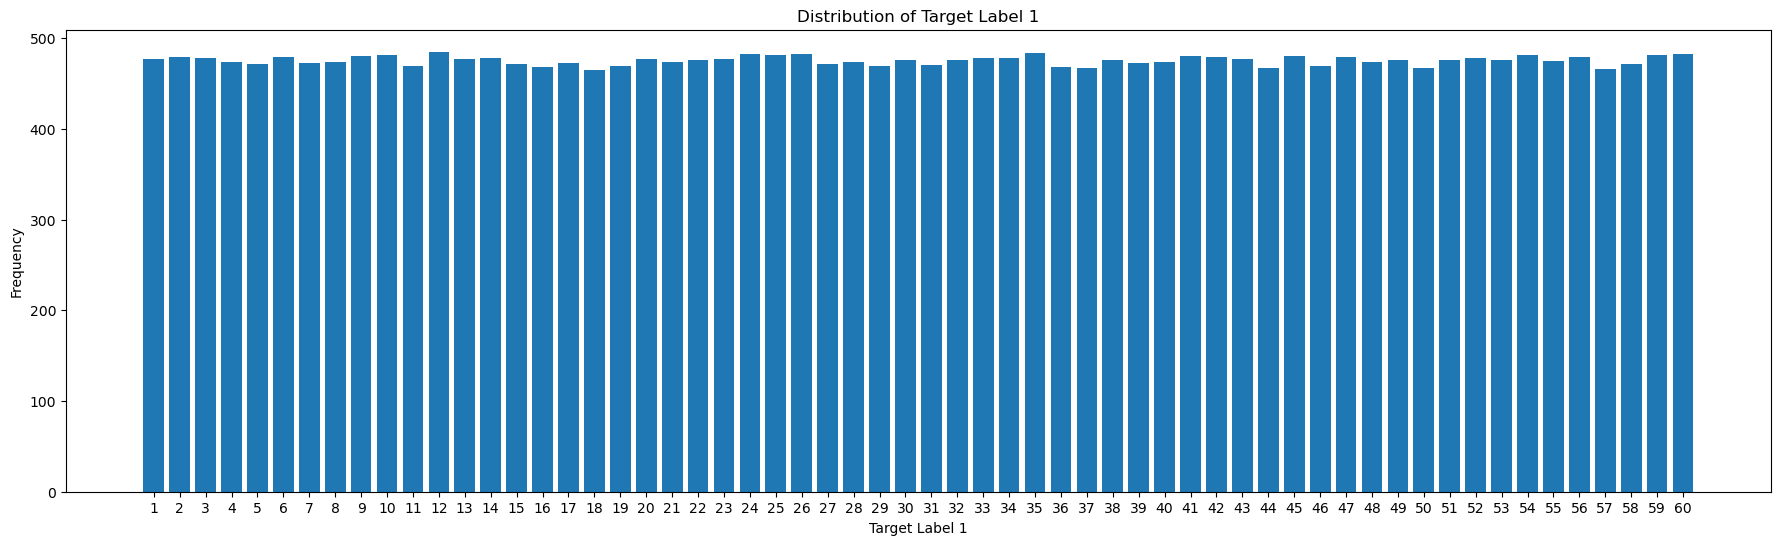

In [122]:
# Plotting the distribution of train_label1
labels, counts = np.unique(train_label1, return_counts=True)

plt.figure(figsize=(22, 6))
plt.xticks(labels)
plt.bar(labels, counts)
plt.xlabel('Target Label 1')
plt.ylabel('Frequency')
plt.title('Distribution of Target Label 1')
plt.show()

### Feature Standardization

Standardize the features of all datasets using standard scaler beacause outliers are present

In [123]:
# Standardize the features
scaler = StandardScaler()
standardized_train_features_label1 = scaler.fit_transform(train_features_label1)
standardized_valid_features_label1 = scaler.transform(valid_features_label1)
standardized_test_features_label1 = scaler.transform(test_features_label1)

### Feature Extraction

Extract can combine the features that are highly significant in predicting the label using Principal Componenet Analysis(PCA)  
Extract the features that can explain the variance of the label to 98%  
Display the resulting explained variances of each principal component  

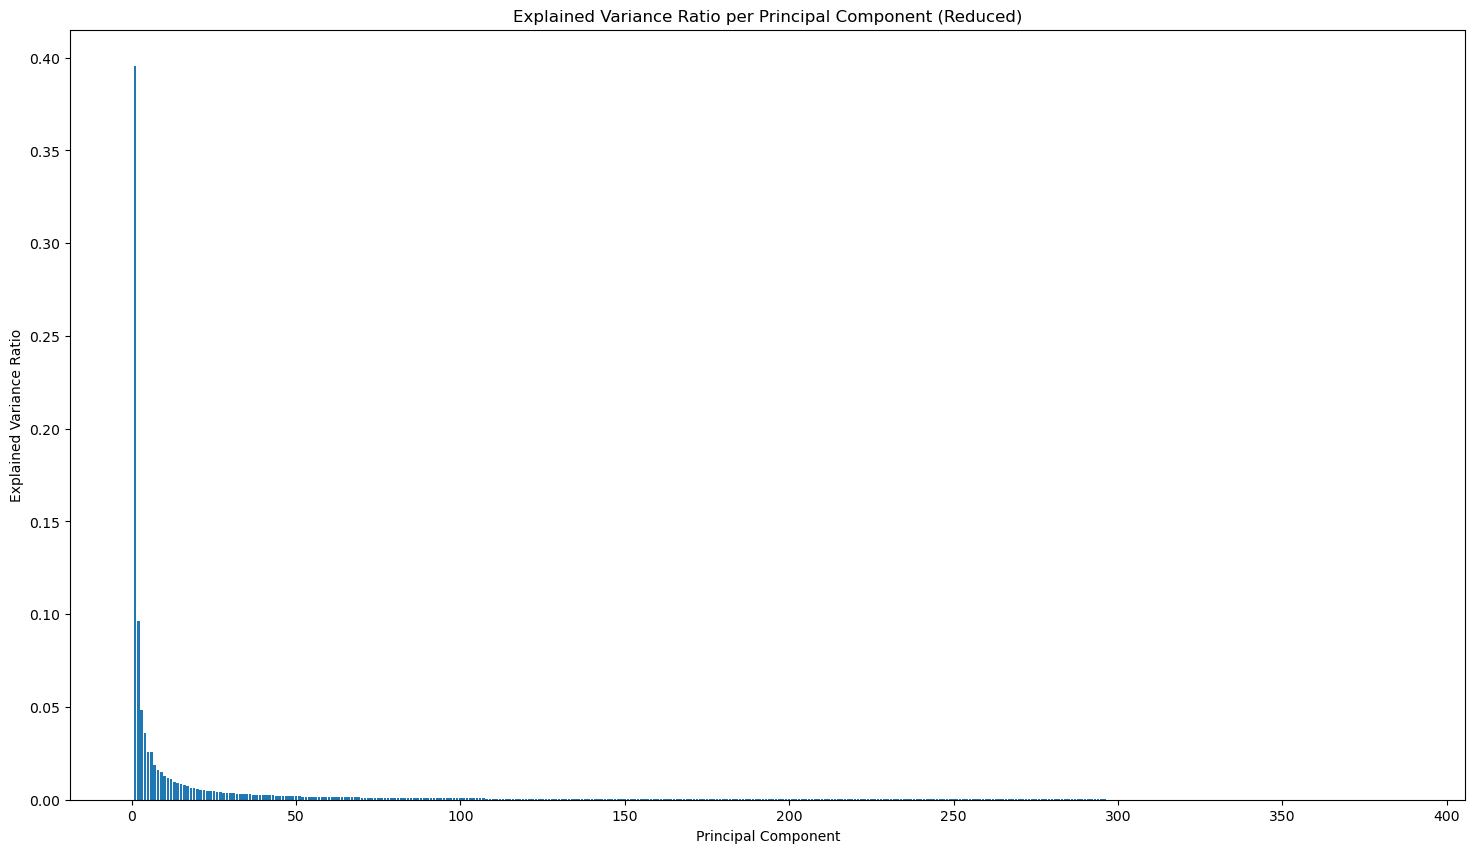

Reduced Train feature matrix shape: (28520, 386)
Reduced valid feature matrix shape: (750, 386)
Reduced test feature matrix shape: (744, 386)


In [124]:
variance_threshold = 0.99

# Apply PCA with the determined number of components
pca = PCA(n_components=variance_threshold, svd_solver='full')

pca_train_features_label1 = pca.fit_transform(standardized_train_features_label1)
pca_valid_features_label1 = pca.transform(standardized_valid_features_label1)
pca_test_features_label1 = pca.transform(standardized_test_features_label1)

# Explained variance ratio after dimensionality reduction
explained_variance_ratio_reduced = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(18, 10))
plt.bar(range(1, pca_train_features_label1.shape[1] + 1), explained_variance_ratio_reduced)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component (Reduced)')
plt.show()

# Display the reduced train feature matrix
print("Reduced Train feature matrix shape: {}".format(pca_train_features_label1.shape))
# Display the reduced valid feature matrix
print("Reduced valid feature matrix shape: {}".format(pca_valid_features_label1.shape))
# Display the reduced test feature matrix
print("Reduced test feature matrix shape: {}".format(pca_test_features_label1.shape))

### Feature Selection

Calculate the correlation matrix of the training data features

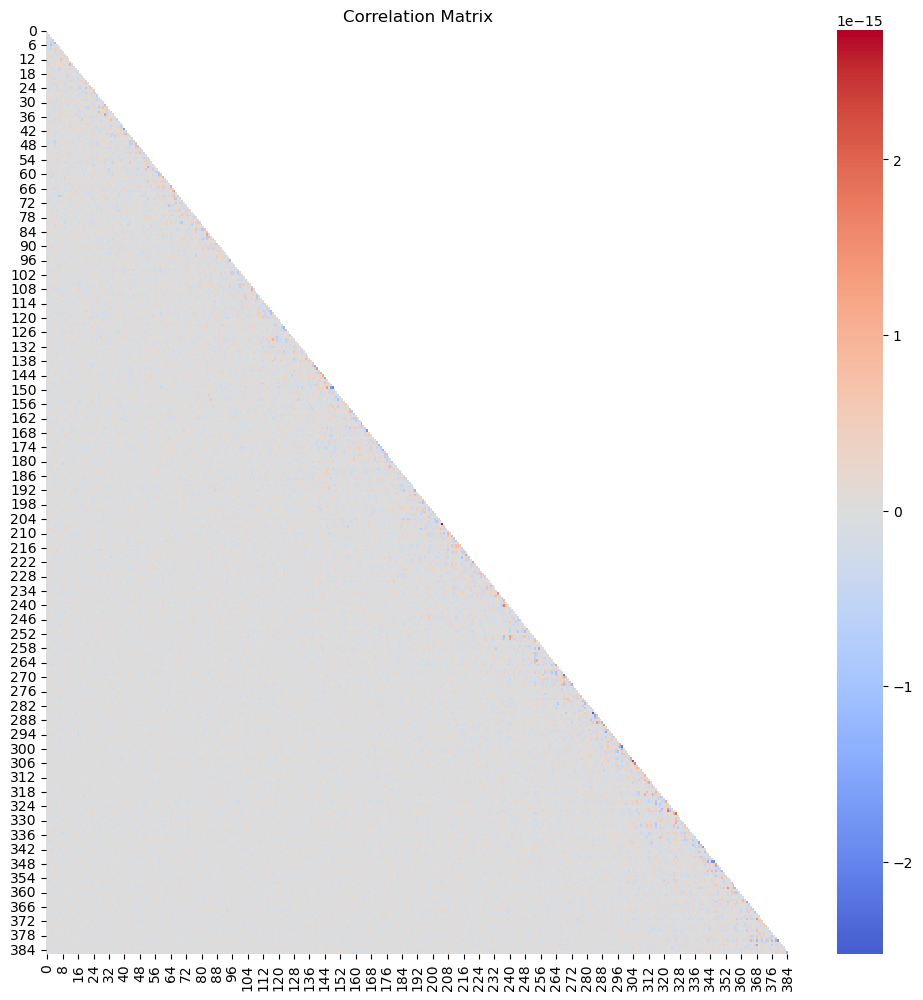

In [125]:
#Calculate the correlation matrix
correlation_matrix = pd.DataFrame(pca_train_features_label1).corr()

mask = np.triu(np.ones_like(correlation_matrix))

# Create a heatmap of the correlation matrix using seaborn
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, mask=mask)
plt.title("Correlation Matrix")
plt.show()

Identify the features that are highly correlated with each other using the training dataset

In [126]:
# Set the threshold for correlation
correlation_threshold = 0.9

highly_correlated = set()

# Find highly correlated features
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated.add(colname)

print(highly_correlated)

set()


Remove the previously identified highly correlated features from all the datasets

In [127]:
# Remove highly correlated features
pca_train_features_label1 = pd.DataFrame(pca_train_features_label1).drop(columns=highly_correlated)
pca_valid_features_label1 = pd.DataFrame(pca_valid_features_label1).drop(columns=highly_correlated)
pca_test_features_label1 = pd.DataFrame(pca_test_features_label1).drop(columns=highly_correlated)

Display the resulting feature shapes of the datasets

In [128]:
# Display the filtered train feature count
print("Filtered train features: {}".format(pca_train_features_label1.shape))

# Display the filtered valid feature count
print("Filtered valid features: {}".format(pca_valid_features_label1.shape))

# Display the filtered test feature count
print("Filtered test features: {}".format(pca_test_features_label1.shape))

Filtered train features: (28520, 386)
Filtered valid features: (750, 386)
Filtered test features: (744, 386)


Convert dataframe to numpy array

In [129]:
pca_train_features_label1 = pca_train_features_label1.to_numpy()
train_label1 = train_label1.to_numpy()

pca_valid_features_label1 = pca_valid_features_label1.to_numpy()
valid_label1 = valid_label1.to_numpy()

pca_test_features_label1 = pca_test_features_label1.to_numpy()

## Hyperparameter tuning

Define parameters for random search

In [130]:
knn_grid_params = {
    'n_neighbors' : [3, 5, 7, 9, 11, 13],
    'weights' : ['uniform', 'distance'],
    'metric' : ['minkowski', 'euclidean', 'manhattan', 'hamming']
}

xgb_grid_params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

svm_grid_params = {
    'C': [0.1, 1, 10, 30, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto', 'scale'],
    'kernel': ['rbf', 'linear']
}

Execute random search for KNN, XGBoost and SVM

In [ ]:
classification_models_params = [
    ('K Neighbors', KNeighborsClassifier(), knn_grid_params),
    ('XGBoost', XGBClassifier(), xgb_grid_params),
    ('SVM', SVC(), svm_grid_params)
]

for model_name, model, grid_params in classification_models_params:
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rs = RandomizedSearchCV(
        estimator = model,
        param_distributions = grid_params,
        n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1
    )
    rs_result = rs.fit(pca_train_features_label1, train_label1)

    print(f"best score for {model_name} : {rs_result.best_score_}")
    print(f"best hyper parameters for {model_name} : {rs_result.best_params_}")

## Model Selection

Select the model that best predicts the valid and test datasets based on accuracy, precision and recall

In [131]:
# Define a list of classification models
classification_models = [
    # ('K Neighbors', KNeighborsClassifier()),
    # ('XGBoost', XGBClassifier()),
    ('SVM', SVC(C=100, gamma='scale', kernel='rbf')),
]

# The best model is SVM then XGBoost then KNN

# Number of features used in PCA
num_features = pca_train_features_label1.shape[1]
print(f"Number of features: {num_features}\n")

# Train and evaluate each classification model
for model_name, model in classification_models:
    if (model_name == 'XGBoost'):
        le = LabelEncoder()
        train_label1 = le.fit_transform(train_label1)
        
        
    # Train the model on the training data
    model.fit(pca_train_features_label1, train_label1)

    # Predict on the train data
    y_pred_train_label1 = model.predict(pca_train_features_label1)
    
    if (model_name == 'XGBoost'):
        train_label1 = le.inverse_transform(train_label1)
        y_pred_train_label1 = le.inverse_transform(y_pred_train_label1)

    # Calculate metrics for classification evaluation
    accuracy = accuracy_score(train_label1, y_pred_train_label1)
    precision = precision_score(train_label1, y_pred_train_label1, average='macro', zero_division=1)
    recall = recall_score(train_label1, y_pred_train_label1, average='macro')

    print(f"Metrics for {model_name} on train data:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")

    # Predict on the validation data
    y_pred_valid_label1 = model.predict(pca_valid_features_label1)
    
    if (model_name == 'XGBoost'):
        y_pred_valid_label1 = le.inverse_transform(y_pred_valid_label1)

    # Calculate metrics for classification evaluation on validation data
    accuracy = accuracy_score(valid_label1, y_pred_valid_label1)
    precision = precision_score(valid_label1, y_pred_valid_label1, average='macro', zero_division=1)
    recall = recall_score(valid_label1, y_pred_valid_label1, average='macro')

    print(f"Metrics for {model_name} on validation data:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")

    # Predict on the test data
    y_pred_test_label1 = model.predict(pca_test_features_label1)
    
    if (model_name == 'XGBoost'):
        y_pred_test_label1 = le.inverse_transform(y_pred_test_label1)


Number of features: 386

Metrics for SVM on train data:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00


Metrics for SVM on validation data:
Accuracy: 0.95
Precision: 0.95
Recall: 0.95




# Label 2

## Feature Engineering

Predict label 2 with feature engineering steps and techniques.  
Use feature selection based on correlation matrix and feature extraction based on PCA

### Data cleaning

Process the data to remove null values for labels and estimate missing values in features

Drop the columns where there are null values for the lables in the training dataset

In [132]:
# Check for null values in train dataset
print(f"train_data_label2 shape before : {train_data_label2.shape}")
train_null_counts = train_data_label2.isnull().sum()
print(f"train null counts before : \n{train_null_counts}")

# Drop rows with null values in the target labels for train dataset
train_data_label2 = train_data_label2.dropna(subset=train_data_label2.columns[-1:], how='any')
print(f"train_data_label2 shape after : {train_data_label2.shape}")

train_data_label2 shape before : (28520, 769)
train null counts before : 
feature_1        0
feature_2        0
feature_3        0
feature_4        0
feature_5        0
              ... 
feature_765      0
feature_766      0
feature_767      0
feature_768      0
label_2        480
Length: 769, dtype: int64
train_data_label2 shape after : (28040, 769)


Fill the null values in the features with their means in the train, valid and test datasets.

In [133]:
# Fill null values with mean in train dataset
train_data_label2 = train_data_label2.fillna(train_data_label2.mean())

# Fill null values with mean in valid dataset
valid_data_label2 = valid_data_label2.fillna(valid_data_label2.mean())

# Fill null values with mean in test dataset
test_data = test_data.fillna(test_data.mean())

Extract the features and the label

In [134]:
train_features_label2 = train_data_label2.iloc[:, :-1]
train_label2 = train_data_label2.iloc[:, -1].astype('int64')

valid_features_label2 = valid_data_label2.iloc[:, :-1]
valid_label2 = valid_data_label2.iloc[:, -1].astype('int64')

test_features_label2 = test_data

Visualize the distribution of the training label 2

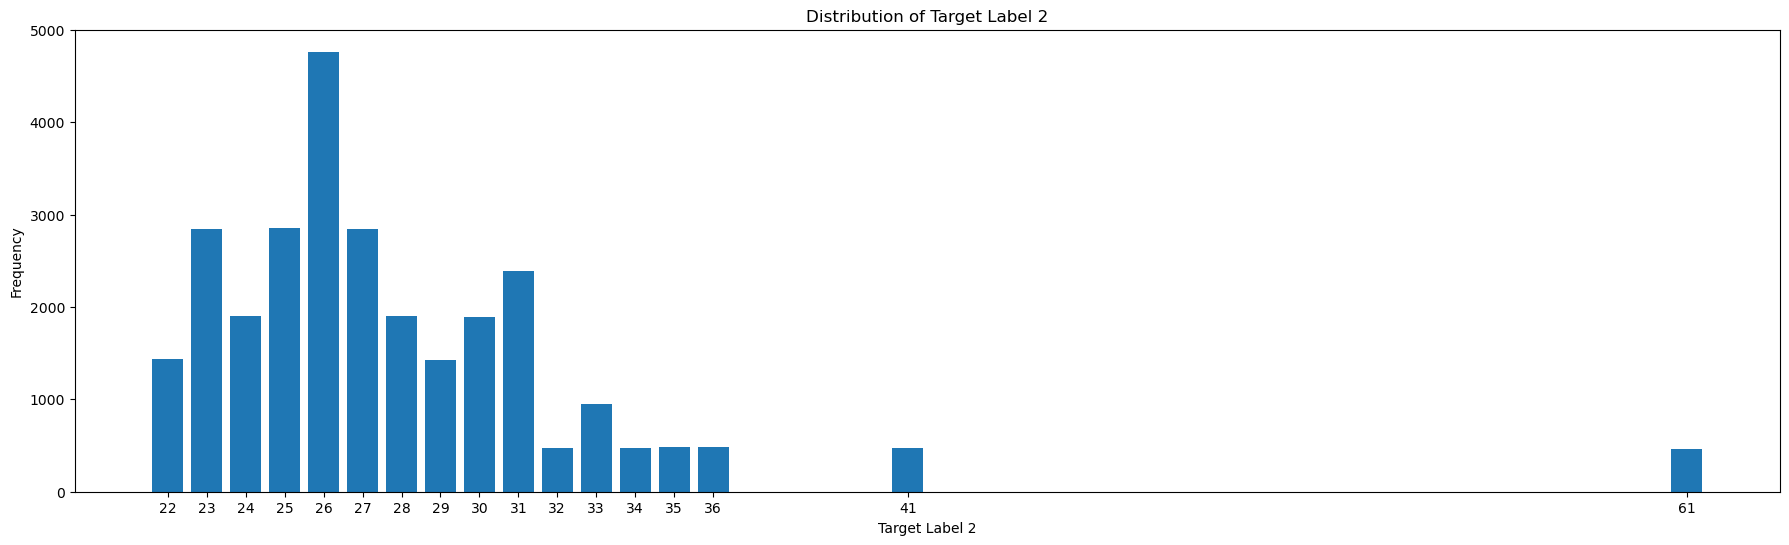

In [135]:
# Plotting the distribution of train_label2
labels, counts = np.unique(train_label2, return_counts=True)

plt.figure(figsize=(22, 6))
plt.xticks(labels)
plt.bar(labels, counts)
plt.xlabel('Target Label 2')
plt.ylabel('Frequency')
plt.title('Distribution of Target Label 2')
plt.show()

### Feature Standardization

Standardize the features of all datasets using standard scaler beacause outliers are present

In [136]:
# Standardize the features
scaler = StandardScaler()
standardized_train_features_label2 = scaler.fit_transform(train_features_label2)
standardized_valid_features_label2 = scaler.transform(valid_features_label2)
standardized_test_features_label2 = scaler.transform(test_features_label2)

### Feature Extraction

Extract can combine the features that are highly significant in predicting the label using Principal Componenet Analysis(PCA)  
Extract the features that can explain the variance of the label to 99%  
Display the resulting explained variances of each principal component  

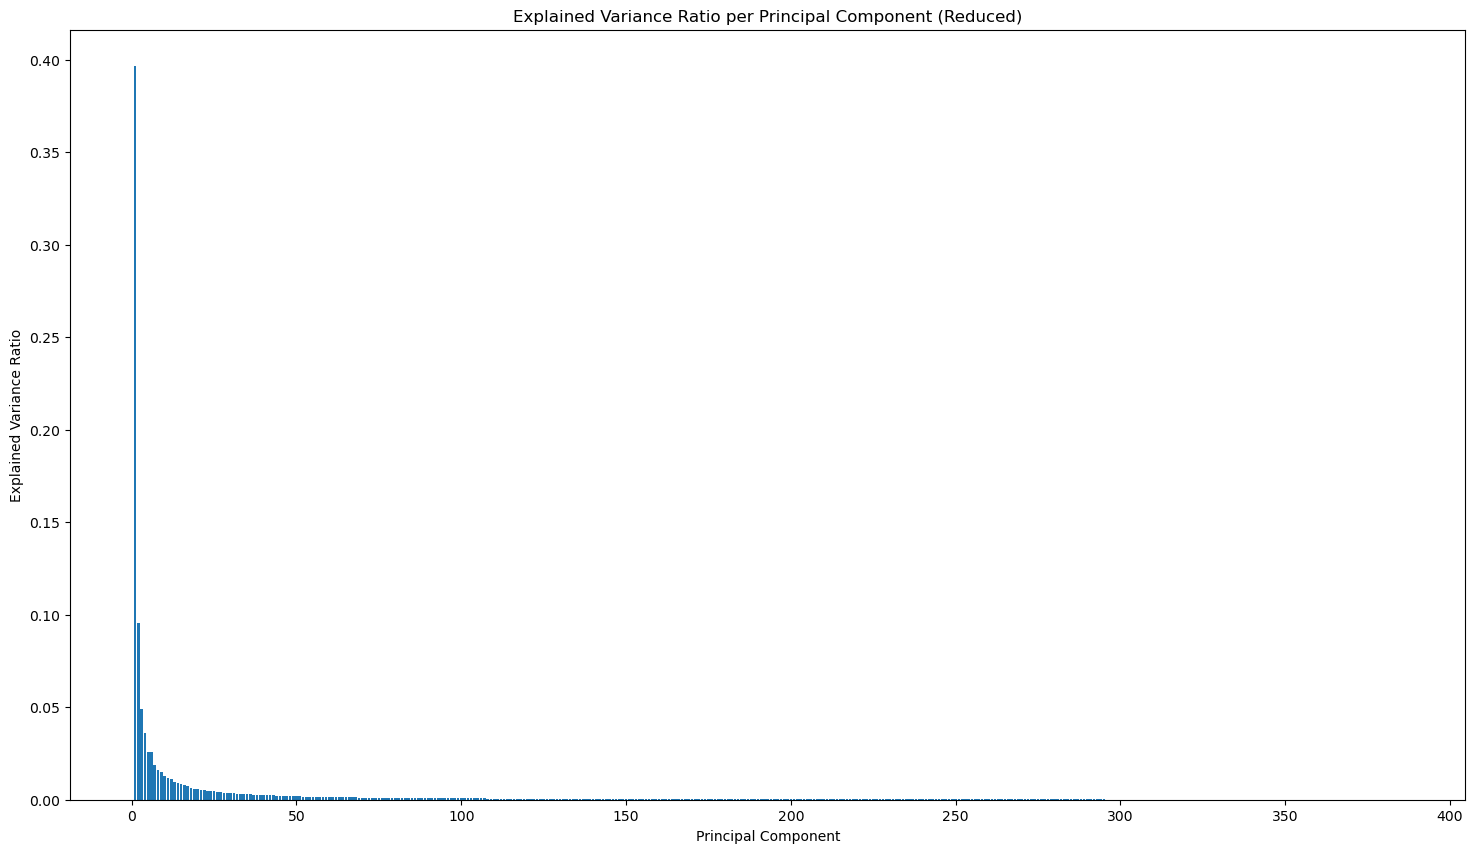

Reduced Train feature matrix shape: (28040, 385)
Reduced valid feature matrix shape: (750, 385)
Reduced test feature matrix shape: (744, 385)


In [137]:
variance_threshold = 0.99

# Apply PCA with the determined number of components
pca = PCA(n_components=variance_threshold, svd_solver='full')

pca_train_features_label2 = pca.fit_transform(standardized_train_features_label2)
pca_valid_features_label2 = pca.transform(standardized_valid_features_label2)
pca_test_features_label2 = pca.transform(standardized_test_features_label2)

# Explained variance ratio after dimensionality reduction
explained_variance_ratio_reduced = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(18, 10))
plt.bar(range(1, pca_train_features_label2.shape[1] + 1), explained_variance_ratio_reduced)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component (Reduced)')
plt.show()

# Display the reduced train feature matrix
print("Reduced Train feature matrix shape: {}".format(pca_train_features_label2.shape))
# Display the reduced valid feature matrix
print("Reduced valid feature matrix shape: {}".format(pca_valid_features_label2.shape))
# Display the reduced test feature matrix
print("Reduced test feature matrix shape: {}".format(pca_test_features_label2.shape))

### Feature Selection

Calculate the correlation matrix of the training data features

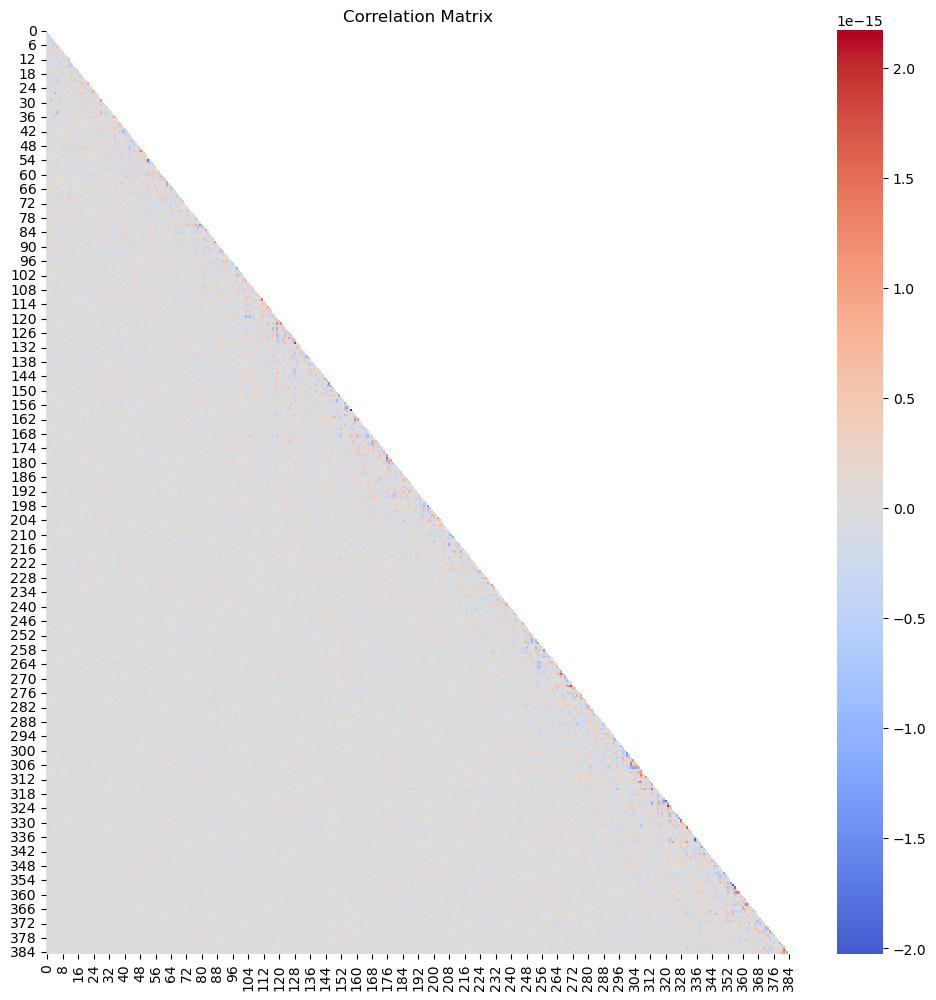

In [138]:
#Calculate the correlation matrix
correlation_matrix = pd.DataFrame(pca_train_features_label2).corr()

mask = np.triu(np.ones_like(correlation_matrix))

# Create a heatmap of the correlation matrix using seaborn
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, mask=mask)
plt.title("Correlation Matrix")
plt.show()

Identify the features that are highly correlated with each other using the traning dataset

In [139]:
# Set the threshold for correlation
correlation_threshold = 0.9

highly_correlated = set()

# Find highly correlated features
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated.add(colname)

print(highly_correlated)

set()


Remove the previously identified highly correlated features from all the datasets

In [140]:
# Remove highly correlated features
pca_train_features_label2 = pd.DataFrame(pca_train_features_label2).drop(columns=highly_correlated)
pca_valid_features_label2 = pd.DataFrame(pca_valid_features_label2).drop(columns=highly_correlated)
pca_test_features_label2 = pd.DataFrame(pca_test_features_label2).drop(columns=highly_correlated)

Display the resulting feature shapes of the datasets

In [141]:
# Display the filtered train feature count
print("Filtered train features: {}".format(pca_train_features_label2.shape))

# Display the filtered valid feature count
print("Filtered valid features: {}".format(pca_valid_features_label2.shape))

# Display the filtered test feature count
print("Filtered test features: {}".format(pca_test_features_label2.shape))

Filtered train features: (28040, 385)
Filtered valid features: (750, 385)
Filtered test features: (744, 385)


Convert dataframe to numpy array

In [142]:
pca_train_features_label2 = pca_train_features_label2.to_numpy()
train_label2 = train_label2.to_numpy()

pca_valid_features_label2 = pca_valid_features_label2.to_numpy()
valid_label2 = valid_label2.to_numpy()

pca_test_features_label2 = pca_test_features_label2.to_numpy()

## Hyperparameter tuning

Define parameters for random search

In [143]:
knn_grid_params = {
    'n_neighbors' : [3, 5, 7, 9, 11, 13],
    'weights' : ['uniform', 'distance'],
    'metric' : ['minkowski', 'euclidean', 'manhattan', 'hamming']
}

xgb_grid_params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

svm_grid_params = {
    'C': [0.1, 1, 10, 30, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto', 'scale'],
    'kernel': ['rbf', 'linear']
}

Execute random search for KNN, XGBoost and SVM

In [ ]:
classification_models_params = [
    ('K Neighbors', KNeighborsClassifier(), knn_grid_params),
    ('XGBoost', XGBClassifier(), xgb_grid_params),
    ('SVM', SVC(), svm_grid_params)
]

for model_name, model, grid_params in classification_models_params:
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rs = RandomizedSearchCV(
        estimator = model,
        param_distributions = grid_params,
        n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1
    )
    rs_result = rs.fit(pca_train_features_label2, train_label2)

    print(f"best score for {model_name} : {rs_result.best_score_}")
    print(f"best hyper parameters for {model_name} : {rs_result.best_params_}")

## Model Selection

Select the model that best predicts the valid and test datasets based on accuracy, precision and recall

In [144]:
# Define a list of classification models
classification_models = [
    # ('K Neighbors', KNeighborsClassifier()),
    # ('XGBoost', XGBClassifier()),
    ('SVM', SVC(C=100, gamma='scale', kernel= 'rbf')),
]

# The best model is SVM then XGBoost then KNN

# Number of features used in PCA
num_features = pca_train_features_label2.shape[1]
print(f"Number of features: {num_features}\n")

# Train and evaluate each classification model
for model_name, model in classification_models:
    if (model_name == 'XGBoost'):
        le = LabelEncoder()
        train_label2 = le.fit_transform(train_label2)
        
        
    # Train the model on the training data
    model.fit(pca_train_features_label2, train_label2)

    # Predict on the train data
    y_pred_train_label2 = model.predict(pca_train_features_label2)
    
    if (model_name == 'XGBoost'):
        train_label2 = le.inverse_transform(train_label2)
        y_pred_train_label2 = le.inverse_transform(y_pred_train_label2)

    # Calculate metrics for classification evaluation
    accuracy = accuracy_score(train_label2, y_pred_train_label2)
    precision = precision_score(train_label2, y_pred_train_label2, average='weighted', zero_division=1)
    recall = recall_score(train_label2, y_pred_train_label2, average='weighted')

    print(f"Metrics for {model_name} on train data:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")

    # Predict on the validation data
    y_pred_valid_label2 = model.predict(pca_valid_features_label2)
    
    if (model_name == 'XGBoost'):
        y_pred_valid_label2 = le.inverse_transform(y_pred_valid_label2)

    # Calculate metrics for classification evaluation on validation data
    accuracy = accuracy_score(valid_label2, y_pred_valid_label2)
    precision = precision_score(valid_label2, y_pred_valid_label2, average='weighted', zero_division=1)
    recall = recall_score(valid_label2, y_pred_valid_label2, average='weighted')

    print(f"Metrics for {model_name} on validation data:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")

    # Predict on the test data
    y_pred_test_label2 = model.predict(pca_test_features_label2)
    
    if (model_name == 'XGBoost'):
        y_pred_test_label2 = le.inverse_transform(y_pred_test_label2)


Number of features: 385



Metrics for SVM on train data:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00


Metrics for SVM on validation data:
Accuracy: 0.90
Precision: 0.91
Recall: 0.90




# Label 3

## Feature Engineering

Predict label 3 with feature engineering steps and techniques.  
Use feature selection based on correlation matrix and feature extraction based on PCA

### Data cleaning

Process the data to remove null values for labels and estimate missing values in features

Drop the columns where there are null values for the lables in the training dataset

In [173]:
# Check for null values in train dataset
print(f"train_data_label3 shape before : {train_data_label3.shape}")
train_null_counts = train_data_label3.isnull().sum()
print(f"train null counts before : \n{train_null_counts}")

# Drop rows with null values in the target labels for train dataset
train_data_label3 = train_data_label3.dropna(subset=train_data_label3.columns[-1:], how='any')
print(f"train_data_label3 shape after : {train_data_label3.shape}")

train_data_label3 shape before : (28520, 769)
train null counts before : 
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
              ..
feature_765    0
feature_766    0
feature_767    0
feature_768    0
label_3        0
Length: 769, dtype: int64
train_data_label3 shape after : (28520, 769)


Fill the null values in the features with their means in the train, valid and test datasets.

In [174]:
# Fill null values with mean in train dataset
train_data_label3 = train_data_label3.fillna(train_data_label3.mean())

# Fill null values with mean in valid dataset
valid_data_label3 = valid_data_label3.fillna(valid_data_label3.mean())

# Fill null values with mean in test dataset
test_data = test_data.fillna(test_data.mean())

Extract the features and the label

In [175]:
train_features_label3 = train_data_label3.iloc[:, :-1]
train_label3 = train_data_label3.iloc[:, -1]

valid_features_label3 = valid_data_label3.iloc[:, :-1]
valid_label3 = valid_data_label3.iloc[:, -1]

test_features_label3 = test_data

Visualize the distribution of the training label 3

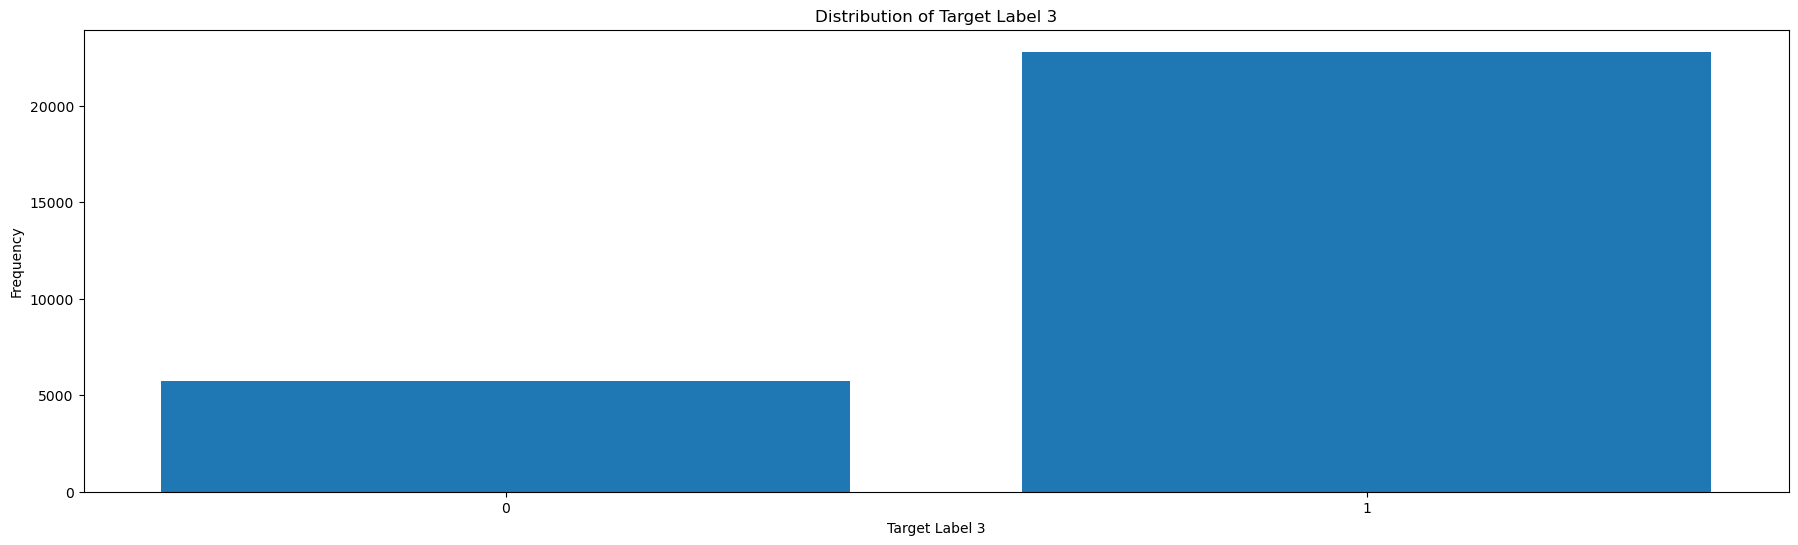

In [176]:
# Plotting the distribution of train_label3
labels, counts = np.unique(train_label3, return_counts=True)

plt.figure(figsize=(22, 6))
plt.xticks(labels)
plt.bar(labels, counts)
plt.xlabel('Target Label 3')
plt.ylabel('Frequency')
plt.title('Distribution of Target Label 3')
plt.show()

### Feature Standardization

Standardize the features of all datasets using standard scaler beacause outliers are present

In [177]:
# Standardize the features
scaler = StandardScaler()
standardized_train_features_label3 = scaler.fit_transform(train_features_label3)
standardized_valid_features_label3 = scaler.transform(valid_features_label3)
standardized_test_features_label3 = scaler.transform(test_features_label3)

### Feature Extraction

Extract can combine the features that are highly significant in predicting the label using Principal Componenet Analysis(PCA)  
Extract the features that can explain the variance of the label to 95%  
Display the resulting explained variances of each principal component  

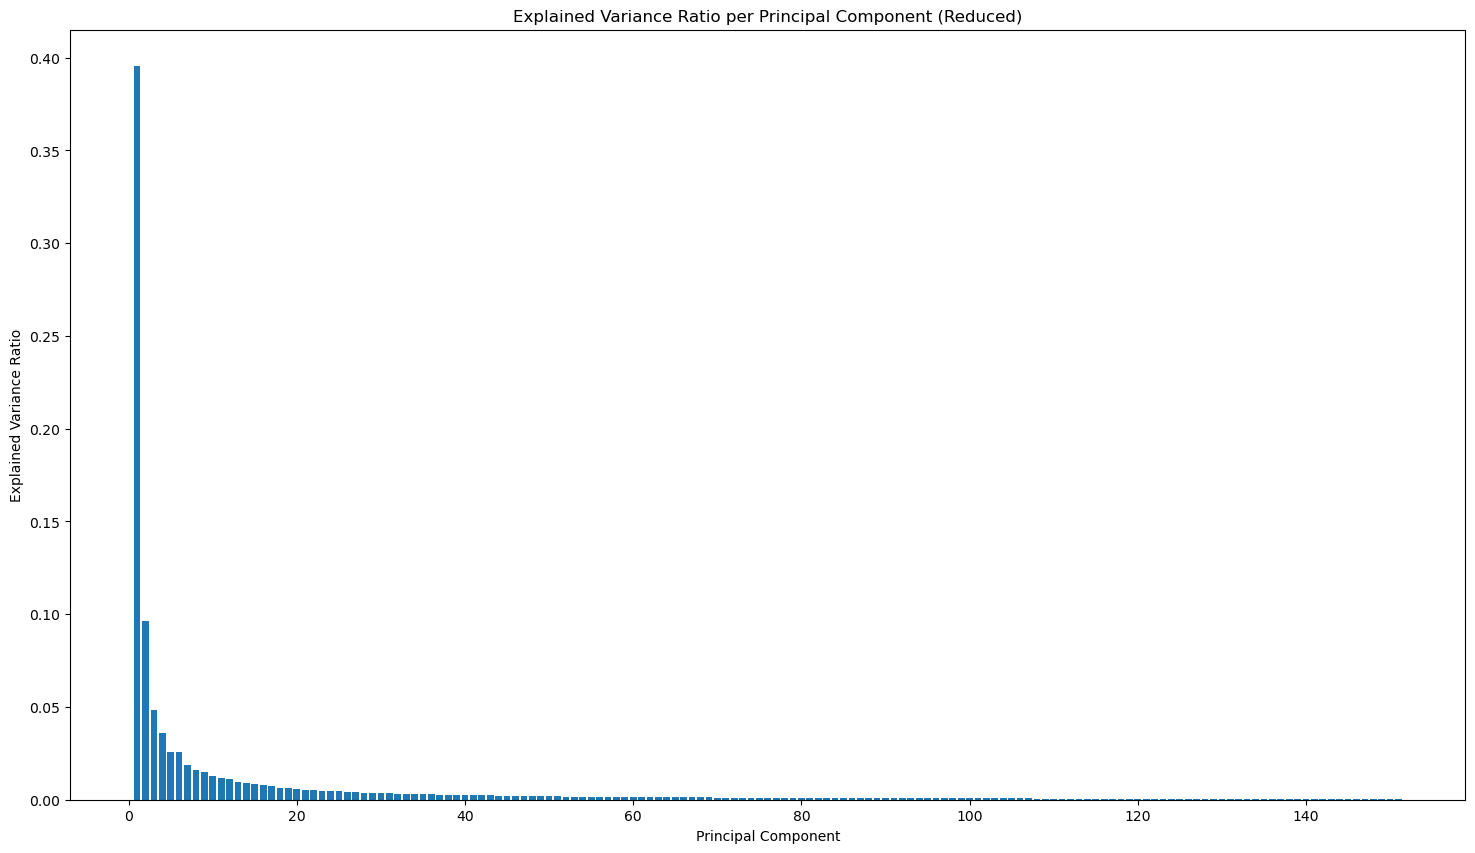

Reduced Train feature matrix shape: (28520, 151)
Reduced valid feature matrix shape: (750, 151)
Reduced test feature matrix shape: (744, 151)


In [178]:
variance_threshold = 0.95

# Apply PCA with the determined number of components
pca = PCA(n_components=variance_threshold, svd_solver='full')

pca_train_features_label3 = pca.fit_transform(standardized_train_features_label3)
pca_valid_features_label3 = pca.transform(standardized_valid_features_label3)
pca_test_features_label3 = pca.transform(standardized_test_features_label3)

# Explained variance ratio after dimensionality reduction
explained_variance_ratio_reduced = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(18, 10))
plt.bar(range(1, pca_train_features_label3.shape[1] + 1), explained_variance_ratio_reduced)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component (Reduced)')
plt.show()

# Display the reduced train feature matrix
print("Reduced Train feature matrix shape: {}".format(pca_train_features_label3.shape))
# Display the reduced valid feature matrix
print("Reduced valid feature matrix shape: {}".format(pca_valid_features_label3.shape))
# Display the reduced test feature matrix
print("Reduced test feature matrix shape: {}".format(pca_test_features_label3.shape))

### Feature Selection

Calculate the correlation matrix of the training data features

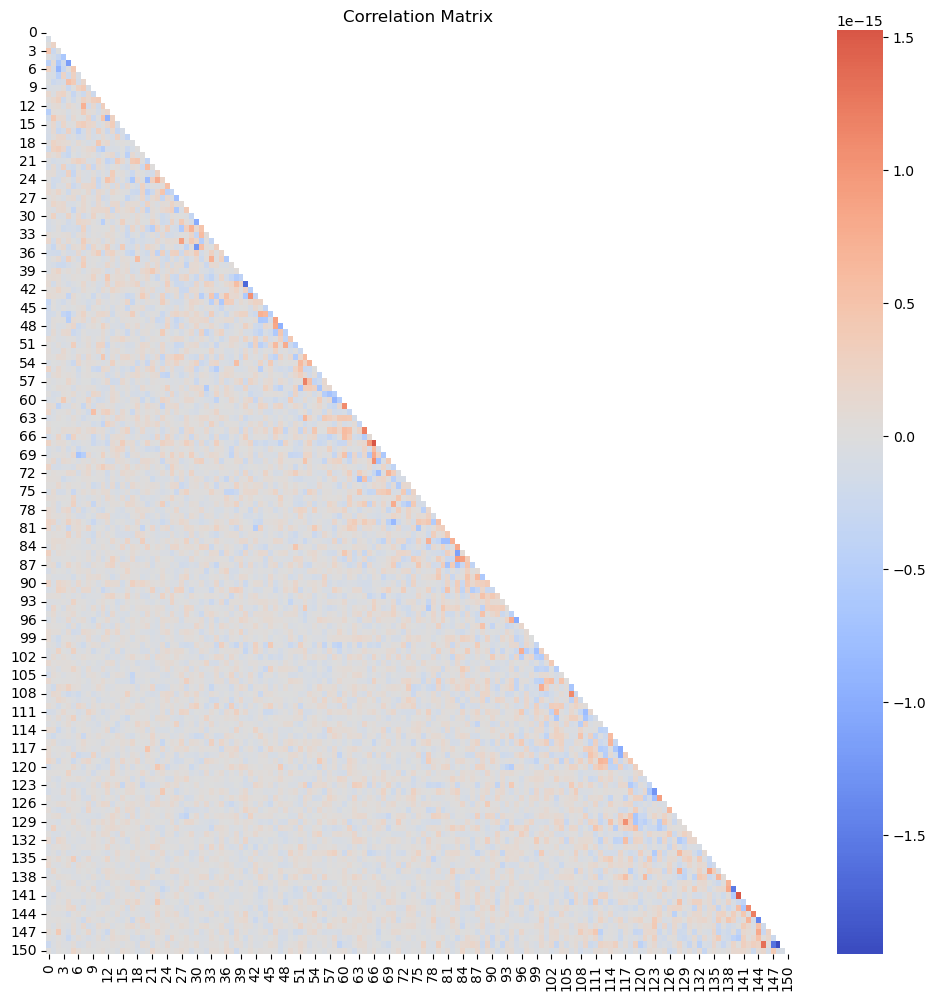

In [179]:
#Calculate the correlation matrix
correlation_matrix = pd.DataFrame(pca_train_features_label3).corr()

mask = np.triu(np.ones_like(correlation_matrix))

# Create a heatmap of the correlation matrix using seaborn
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, mask=mask)
plt.title("Correlation Matrix")
plt.show()

Identify the features that are highly correlated with each other using the traning dataset

In [180]:
# Set the threshold for correlation
correlation_threshold = 0.9

highly_correlated = set()

# Find highly correlated features
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated.add(colname)

print(highly_correlated)

set()


Remove the previously identified highly correlated features from all the datasets

In [181]:
# Remove highly correlated features
pca_train_features_label3 = pd.DataFrame(pca_train_features_label3).drop(columns=highly_correlated)
pca_valid_features_label3 = pd.DataFrame(pca_valid_features_label3).drop(columns=highly_correlated)
pca_test_features_label3 = pd.DataFrame(pca_test_features_label3).drop(columns=highly_correlated)

Display the resulting feature shapes of the datasets

In [182]:
# Display the filtered train feature count
print("Filtered train features: {}".format(pca_train_features_label3.shape))

# Display the filtered valid feature count
print("Filtered valid features: {}".format(pca_valid_features_label3.shape))

# Display the filtered test feature count
print("Filtered test features: {}".format(pca_test_features_label3.shape))

Filtered train features: (28520, 151)
Filtered valid features: (750, 151)
Filtered test features: (744, 151)


Convert dataframe to numpy array

In [183]:
pca_train_features_label3 = pca_train_features_label3.to_numpy()
train_label3 = train_label3.to_numpy()

pca_valid_features_label3 = pca_valid_features_label3.to_numpy()
valid_label3 = valid_label3.to_numpy()

pca_test_features_label3 = pca_test_features_label3.to_numpy()

## Hyperparameter tuning

Define parameters for random search

In [184]:
knn_grid_params = {
    'n_neighbors' : [3, 5, 7, 9, 11, 13],
    'weights' : ['uniform', 'distance'],
    'metric' : ['minkowski', 'euclidean', 'manhattan', 'hamming']
}


rf_grid_params = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

svm_grid_params = {
    'C': [0.1, 1, 10, 30, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto', 'scale'],
    'kernel': ['rbf', 'linear'],
    'class_weight': [None, 'balanced']
}

Execute random search for KNN, XGBoost and SVM

In [ ]:
classification_models_params = [
    ('K Neighbors', KNeighborsClassifier(), knn_grid_params),
    ('XGBoost', XGBClassifier(), xgb_grid_params),
    ('SVM', SVC(), svm_grid_params)
]

for model_name, model, grid_params in classification_models_params:
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rs = RandomizedSearchCV(
        estimator = model,
        param_distributions = grid_params,
        n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1
    )
    rs_result = rs.fit(pca_train_features_label3, train_label3)

    print(f"best score for {model_name} : {rs_result.best_score_}")
    print(f"best hyper parameters for {model_name} : {rs_result.best_params_}")

## Model Selection

Select the model that best predicts the valid and test datasets based on accuracy, precision and recall

In [185]:
# Define a list of classification models
classification_models = [
    # ('K Neighbors', KNeighborsClassifier()),
    # ('XGBoost', XGBClassifier()),
    ('SVM', SVC(C=100, gamma='scale', kernel='rbf')),
]

# The best model is SVM then XGBoost then KNN

# Number of features used in PCA
num_features = pca_train_features_label3.shape[1]
print(f"Number of features: {num_features}\n")

# Train and evaluate each classification model
for model_name, model in classification_models:
    if (model_name == 'XGBoost'):
        le = LabelEncoder()
        train_label3 = le.fit_transform(train_label3)
        
        
    # Train the model on the training data
    model.fit(pca_train_features_label3, train_label3)

    # Predict on the train data
    y_pred_train_label3 = model.predict(pca_train_features_label3)
    
    if (model_name == 'XGBoost'):
        train_label3 = le.inverse_transform(train_label3)
        y_pred_train_label3 = le.inverse_transform(y_pred_train_label3)

    # Calculate metrics for classification evaluation
    accuracy = accuracy_score(train_label3, y_pred_train_label3)
    precision = precision_score(train_label3, y_pred_train_label3, average='weighted', zero_division=1)
    recall = recall_score(train_label3, y_pred_train_label3, average='weighted')

    print(f"Metrics for {model_name} on train data:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")

    # Predict on the validation data
    y_pred_valid_label3 = model.predict(pca_valid_features_label3)
    
    if (model_name == 'XGBoost'):
        y_pred_valid_label3 = le.inverse_transform(y_pred_valid_label3)

    # Calculate metrics for classification evaluation on validation data
    accuracy = accuracy_score(valid_label3, y_pred_valid_label3)
    precision = precision_score(valid_label3, y_pred_valid_label3, average='weighted', zero_division=1)
    recall = recall_score(valid_label3, y_pred_valid_label3, average='weighted')

    print(f"Metrics for {model_name} on validation data:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")

    # Predict on the test data
    y_pred_test_label3 = model.predict(pca_test_features_label3)
    
    if (model_name == 'XGBoost'):
        y_pred_test_label3 = le.inverse_transform(y_pred_test_label3)


Number of features: 151

Metrics for SVM on train data:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00


Metrics for SVM on validation data:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00




# Label 4

## Feature Engineering

Predict label 4 with feature engineering steps and techniques.  
Use feature selection based on correlation matrix and feature extraction based on PCA

### Data cleaning

Process the data to remove null values for labels and estimate missing values in features

Drop the columns where there are null values for the lables in the training dataset

In [187]:
# Check for null values in train dataset
print(f"train_data_label4 shape before : {train_data_label4.shape}")
train_null_counts = train_data_label4.isnull().sum()
print(f"train null counts before : \n{train_null_counts}")

# Drop rows with null values in the target labels for train dataset
train_data_label4 = train_data_label4.dropna(subset=train_data_label4.columns[-1:], how='any')
print(f"train_data_label4 shape after : {train_data_label4.shape}")

train_data_label4 shape before : (28520, 769)
train null counts before : 
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
              ..
feature_765    0
feature_766    0
feature_767    0
feature_768    0
label_4        0
Length: 769, dtype: int64
train_data_label4 shape after : (28520, 769)


Fill the null values in the features with their means in the train, valid and test datasets.

In [188]:
# Fill null values with mean in train dataset
train_data_label4 = train_data_label4.fillna(train_data_label4.mean())

# Fill null values with mean in valid dataset
valid_data_label4 = valid_data_label4.fillna(valid_data_label4.mean())

# Fill null values with mean in test dataset
test_data = test_data.fillna(test_data.mean())

Extract the features and the label

In [189]:
train_features_label4 = train_data_label4.iloc[:, :-1]
train_label4 = train_data_label4.iloc[:, -1]

valid_features_label4 = valid_data_label4.iloc[:, :-1]
valid_label4 = valid_data_label4.iloc[:, -1]

test_features_label4 = test_data

Visualize the distribution of the training label 4

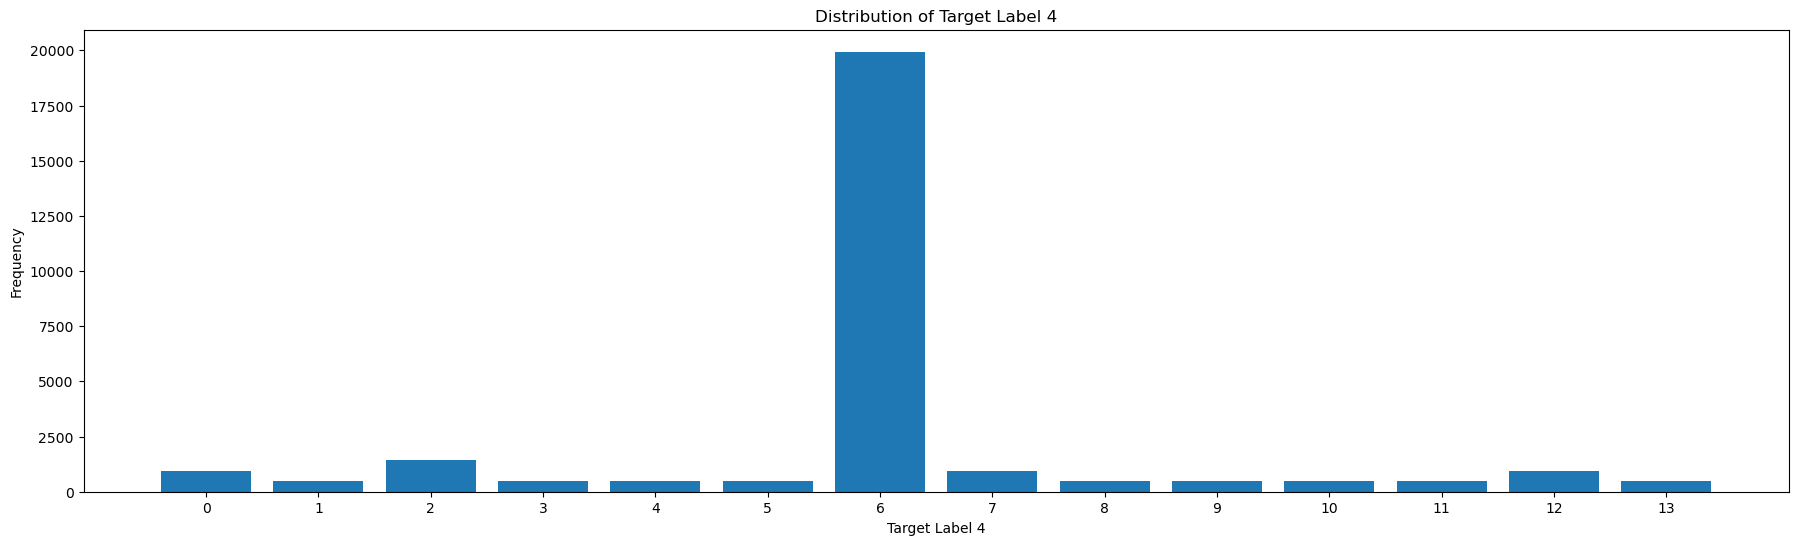

In [190]:
# Plotting the distribution of train_label4
labels, counts = np.unique(train_label4, return_counts=True)

plt.figure(figsize=(22, 6))
plt.xticks(labels)
plt.bar(labels, counts)
plt.xlabel('Target Label 4')
plt.ylabel('Frequency')
plt.title('Distribution of Target Label 4')
plt.show()

### Feature Standardization

Standardize the features of all datasets using standard scaler beacause outliers are present

In [191]:
# Standardize the features
scaler = StandardScaler()
standardized_train_features_label4 = scaler.fit_transform(train_features_label4)
standardized_valid_features_label4 = scaler.transform(valid_features_label4)
standardized_test_features_label4 = scaler.transform(test_features_label4)

### Feature Extraction

Extract can combine the features that are highly significant in predicting the label using Principal Componenet Analysis(PCA)  
Extract the features that can explain the variance of the label to 97%  
Display the resulting explained variances of each principal component  

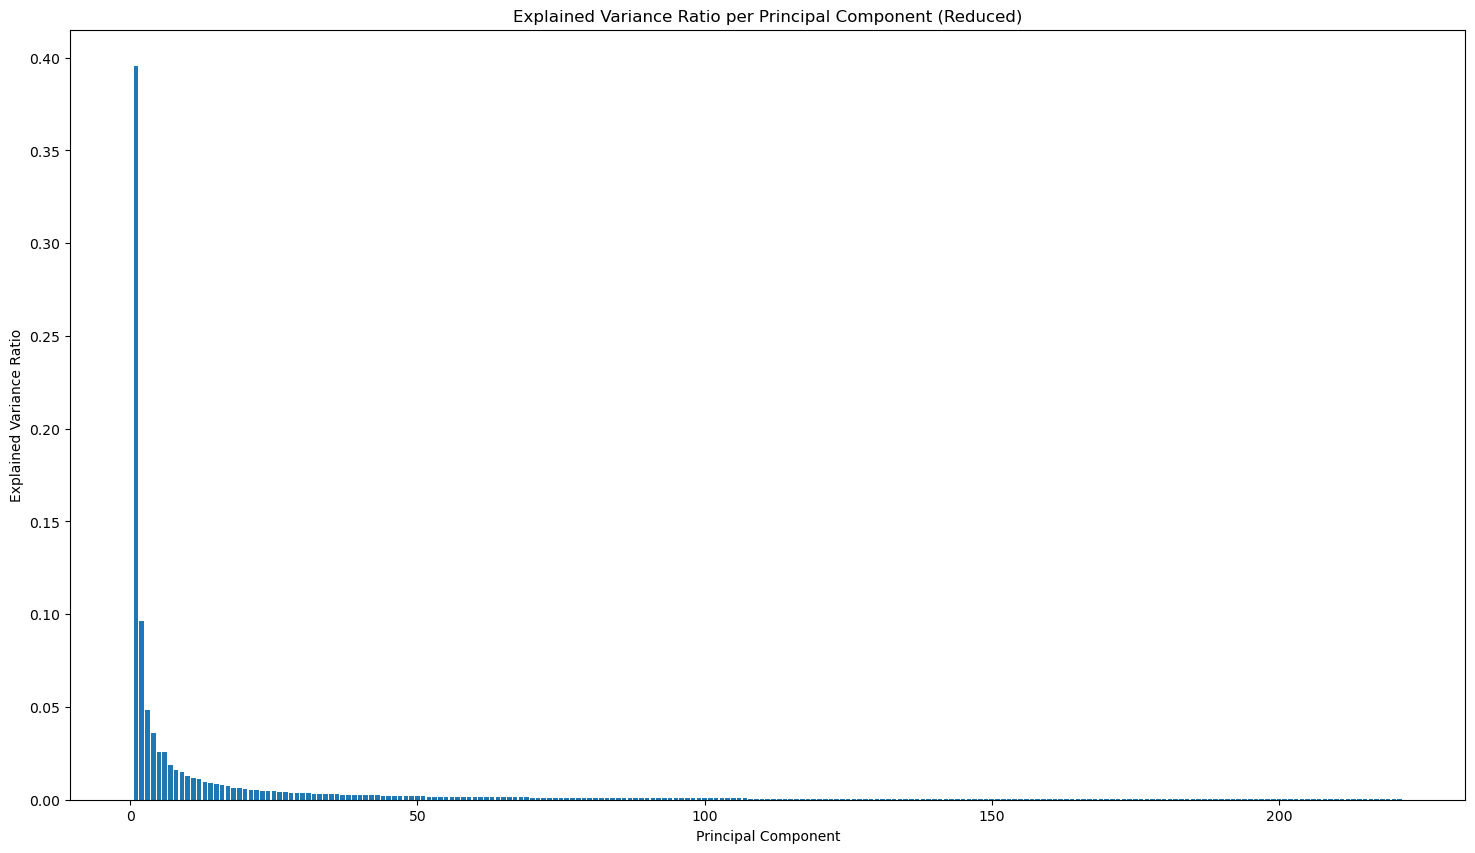

Reduced Train feature matrix shape: (28520, 221)
Reduced valid feature matrix shape: (750, 221)
Reduced test feature matrix shape: (744, 221)


In [192]:
variance_threshold = 0.97

# Apply PCA with the determined number of components
pca = PCA(n_components=variance_threshold, svd_solver='full')

pca_train_features_label4 = pca.fit_transform(standardized_train_features_label4)
pca_valid_features_label4 = pca.transform(standardized_valid_features_label4)
pca_test_features_label4 = pca.transform(standardized_test_features_label4)

# Explained variance ratio after dimensionality reduction
explained_variance_ratio_reduced = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(18, 10))
plt.bar(range(1, pca_train_features_label4.shape[1] + 1), explained_variance_ratio_reduced)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component (Reduced)')
plt.show()

# Display the reduced train feature matrix
print("Reduced Train feature matrix shape: {}".format(pca_train_features_label4.shape))
# Display the reduced valid feature matrix
print("Reduced valid feature matrix shape: {}".format(pca_valid_features_label4.shape))
# Display the reduced test feature matrix
print("Reduced test feature matrix shape: {}".format(pca_test_features_label4.shape))

### Feature Selection

Calculate the correlation matrix of the training data features

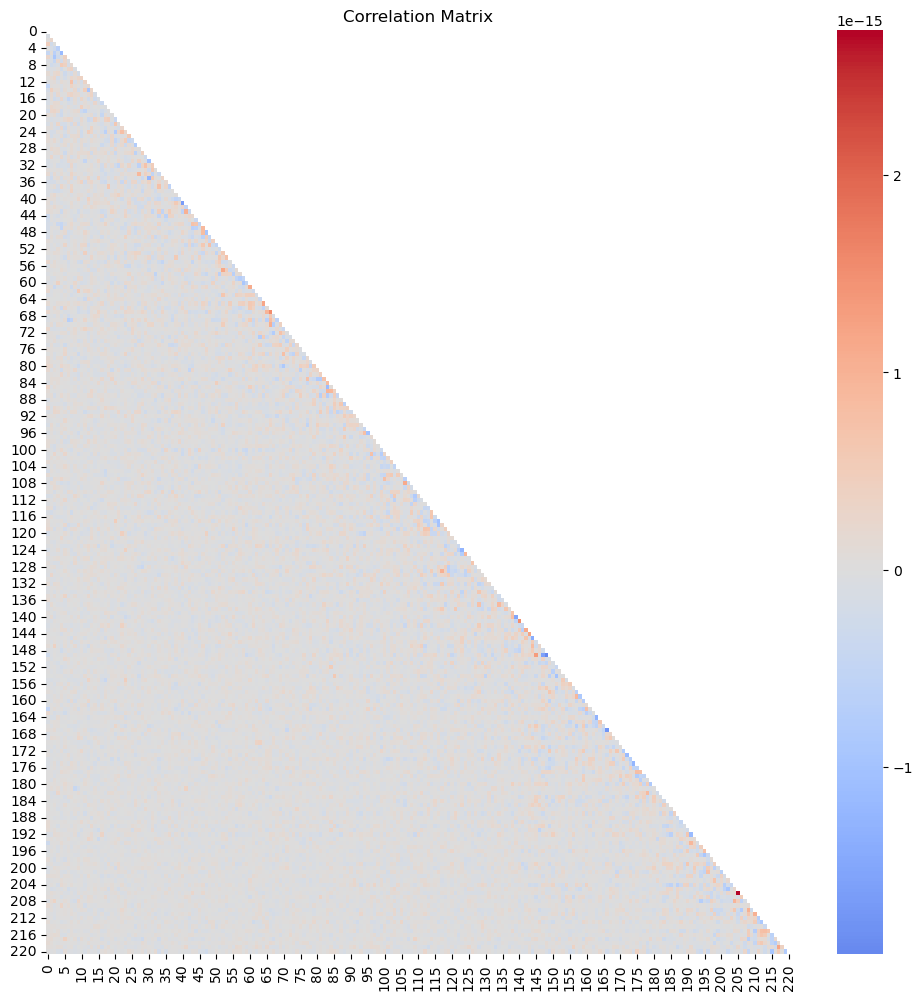

In [193]:
#Calculate the correlation matrix
correlation_matrix = pd.DataFrame(pca_train_features_label4).corr()

mask = np.triu(np.ones_like(correlation_matrix))

# Create a heatmap of the correlation matrix using seaborn
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, mask=mask)
plt.title("Correlation Matrix")
plt.show()

Identify the features that are highly correlated with each other using the traning dataset

In [194]:
# Set the threshold for correlation
correlation_threshold = 0.9

highly_correlated = set()

# Find highly correlated features
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated.add(colname)

print(highly_correlated)

set()


Remove the previously identified highly correlated features from all the datasets

In [195]:
# Remove highly correlated features
pca_train_features_label4 = pd.DataFrame(pca_train_features_label4).drop(columns=highly_correlated)
pca_valid_features_label4 = pd.DataFrame(pca_valid_features_label4).drop(columns=highly_correlated)
pca_test_features_label4 = pd.DataFrame(pca_test_features_label4).drop(columns=highly_correlated)

Display the resulting feature shapes of the datasets

In [196]:
# Display the filtered train feature count
print("Filtered train features: {}".format(pca_train_features_label4.shape))

# Display the filtered valid feature count
print("Filtered valid features: {}".format(pca_valid_features_label4.shape))

# Display the filtered test feature count
print("Filtered test features: {}".format(pca_test_features_label4.shape))

Filtered train features: (28520, 221)
Filtered valid features: (750, 221)
Filtered test features: (744, 221)


Convert dataframe to numpy array

In [197]:
pca_train_features_label4 = pca_train_features_label4.to_numpy()
train_label4 = train_label4.to_numpy()

pca_valid_features_label4 = pca_valid_features_label4.to_numpy()
valid_label4 = valid_label4.to_numpy()

pca_test_features_label4 = pca_test_features_label4.to_numpy()

## Hyperparameter tuning

Define parameters for random search

In [198]:
knn_grid_params = {
    'n_neighbors' : [3, 5, 7, 9, 11, 13],
    'weights' : ['uniform', 'distance'],
    'metric' : ['minkowski', 'euclidean', 'manhattan', 'hamming']
}

xgb_grid_params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

svm_grid_params = {
    'C': [0.1, 1, 10, 30, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto', 'scale'],
    'kernel': ['rbf', 'linear']
}

Execute random search for KNN, XGBoost and SVM

In [ ]:
classification_models_params = [
    ('K Neighbors', KNeighborsClassifier(), knn_grid_params),
    ('XGBoost', XGBClassifier(), xgb_grid_params),
    ('SVM', SVC(), svm_grid_params)
]

for model_name, model, grid_params in classification_models_params:
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rs = RandomizedSearchCV(
        estimator = model,
        param_distributions = grid_params,
        n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1
    )
    rs_result = rs.fit(pca_train_features_label4, train_label4)

    print(f"best score for {model_name} : {rs_result.best_score_}")
    print(f"best hyper parameters for {model_name} : {rs_result.best_params_}")

## Model Selection

Select the model that best predicts the valid and test datasets based on accuracy, precision and recall

In [199]:
# Define a list of classification models
classification_models = [
    # ('K Neighbors', KNeighborsClassifier(n_neighbors=7, weights='distance', metric= 'manhattan')),
    # ('XGBoost', XGBClassifier()),
    ('SVM', SVC(C=100, gamma='scale', kernel='rbf')),
]

# The best model is SVM then KNN then XGBoost

# Number of features used in PCA
num_features = pca_train_features_label4.shape[1]
print(f"Number of features: {num_features}\n")

# Train and evaluate each classification model
for model_name, model in classification_models:
    if (model_name == 'XGBoost'):
        le = LabelEncoder()
        train_label4 = le.fit_transform(train_label4)
        
        
    # Train the model on the training data
    model.fit(pca_train_features_label4, train_label4)

    # Predict on the train data
    y_pred_train_label4 = model.predict(pca_train_features_label4)
    
    if (model_name == 'XGBoost'):
        train_label4 = le.inverse_transform(train_label4)
        y_pred_train_label4 = le.inverse_transform(y_pred_train_label4)

    # Calculate metrics for classification evaluation
    accuracy = accuracy_score(train_label4, y_pred_train_label4)
    precision = precision_score(train_label4, y_pred_train_label4, average='weighted', zero_division=1)
    recall = recall_score(train_label4, y_pred_train_label4, average='weighted')

    print(f"Metrics for {model_name} on train data:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")

    # Predict on the validation data
    y_pred_valid_label4 = model.predict(pca_valid_features_label4)
    
    if (model_name == 'XGBoost'):
        y_pred_valid_label4 = le.inverse_transform(y_pred_valid_label4)

    # Calculate metrics for classification evaluation on validation data
    accuracy = accuracy_score(valid_label4, y_pred_valid_label4)
    precision = precision_score(valid_label4, y_pred_valid_label4, average='weighted', zero_division=1)
    recall = recall_score(valid_label4, y_pred_valid_label4, average='weighted')

    print(f"Metrics for {model_name} on validation data:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")

    # Predict on the test data
    y_pred_test_label4 = model.predict(pca_test_features_label4)
    
    if (model_name == 'XGBoost'):
        y_pred_test_label4 = le.inverse_transform(y_pred_test_label4)


Number of features: 221

Metrics for SVM on train data:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00


Metrics for SVM on validation data:
Accuracy: 0.95
Precision: 0.95
Recall: 0.95




# Generate Output CSV

Define method to create the csv file

In [ ]:
# define method to create the dataframe and save it as a csv file
def create_csv(ID, pred_label1, pred_label2, pred_label3, pred_label4, destination):
  df = pd.DataFrame()
  
  df.insert(loc=0, column='ID', value=ID)
  df.insert(loc=1, column='label_1', value=pred_label1)
  df.insert(loc=2, column='label_2', value=pred_label2)
  df.insert(loc=3, column='label_3', value=pred_label3)
  df.insert(loc=4, column='label_4', value=pred_label4)

  df.to_csv(destination, index=False)

Create CSV file

In [ ]:
destination = './../results/layer 11/L11_190429G.csv'

# create the csv output file
create_csv(ID, y_pred_test_label1, y_pred_test_label2, y_pred_test_label3, y_pred_test_label4, destination)